# Basic Setup and Data Loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [3]:
clinical = pd.read_csv("../Data/train_clinical_data.csv")
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB


In [4]:
clinical.shape

(2615, 8)

In [5]:
clinical.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [6]:
clinical.describe

<bound method NDFrame.describe of       visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0         55_0          55            0     10.0      6.0     15.0      NaN   
1         55_3          55            3     10.0      7.0     25.0      NaN   
2         55_6          55            6      8.0     10.0     34.0      NaN   
3         55_9          55            9      8.0      9.0     30.0      0.0   
4        55_12          55           12     10.0     10.0     41.0      0.0   
...        ...         ...          ...      ...      ...      ...      ...   
2610  65043_48       65043           48      7.0      6.0     13.0      0.0   
2611  65043_54       65043           54      4.0      8.0     11.0      1.0   
2612  65043_60       65043           60      6.0      6.0     16.0      1.0   
2613  65043_72       65043           72      3.0      9.0     14.0      1.0   
2614  65043_84       65043           84      7.0      9.0     20.0      3.0   

     upd23b_clini

In [7]:
clinical.dtypes

visit_id                                object
patient_id                               int64
visit_month                              int64
updrs_1                                float64
updrs_2                                float64
updrs_3                                float64
updrs_4                                float64
upd23b_clinical_state_on_medication     object
dtype: object

In [8]:
clinical.columns

Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'],
      dtype='object')

In [9]:
clinical.drop(columns = ['upd23b_clinical_state_on_medication'], inplace = True)

In [10]:
clinical.duplicated().sum()

np.int64(0)

In [11]:
clinical.duplicated(subset = ['visit_id']).sum()

np.int64(0)

In [12]:
clinical.isna().sum()

visit_id          0
patient_id        0
visit_month       0
updrs_1           1
updrs_2           2
updrs_3          25
updrs_4        1038
dtype: int64

In [13]:
clinical.shape

(2615, 7)

In [14]:
clinical['visit_month'].value_counts()

visit_month
0      248
12     243
24     243
36     226
48     196
6      192
18     187
30     173
60     166
42     154
3      115
54     110
84     100
9       99
72      93
96      58
108     12
Name: count, dtype: int64

In [15]:
clinical.columns

Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4'],
      dtype='object')

## UPDRS1

In [16]:
clinical_updrs1_prelim = clinical[[ 'patient_id', 'visit_month', 'updrs_1' ]].copy()

In [17]:
clinical_updrs1 = clinical_updrs1_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_1' )

In [18]:
clinical_updrs1.columns

Index([0, 3, 6, 9, 12, 18, 24, 30, 36, 42, 48, 54, 60, 72, 84, 96, 108], dtype='int64', name='visit_month')

In [19]:
clinical_updrs1.head()

visit_month,0,3,6,9,12,18,24,30,36,42,48,54,60,72,84,96,108
patient_id,,,,,,,,,,,,,,,,,
55,10.0,10.0,8.0,8.0,10.0,7.0,16.0,14.0,17.0,12.0,17.0,12.0,23.0,NaN,NaN,NaN,NaN
942,3.0,7.0,8.0,NaN,5.0,6.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,6.0,NaN
1517,11.0,NaN,17.0,NaN,20.0,23.0,19.0,20.0,20.0,15.0,20.0,NaN,19.0,NaN,NaN,NaN,NaN
1923,2.0,NaN,2.0,NaN,1.0,2.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660,2.0,NaN,NaN,NaN,0.0,NaN,2.0,NaN,8.0,NaN,6.0,NaN,5.0,NaN,NaN,NaN,NaN


In [20]:
clinical_updrs1.shape

(248, 17)

In [21]:
clinical_updrs1.isna().sum()

visit_month
0        0
3      133
6       56
9      149
12       5
18      61
24       5
30      75
36      22
42      95
48      52
54     138
60      82
72     155
84     148
96     190
108    236
dtype: int64

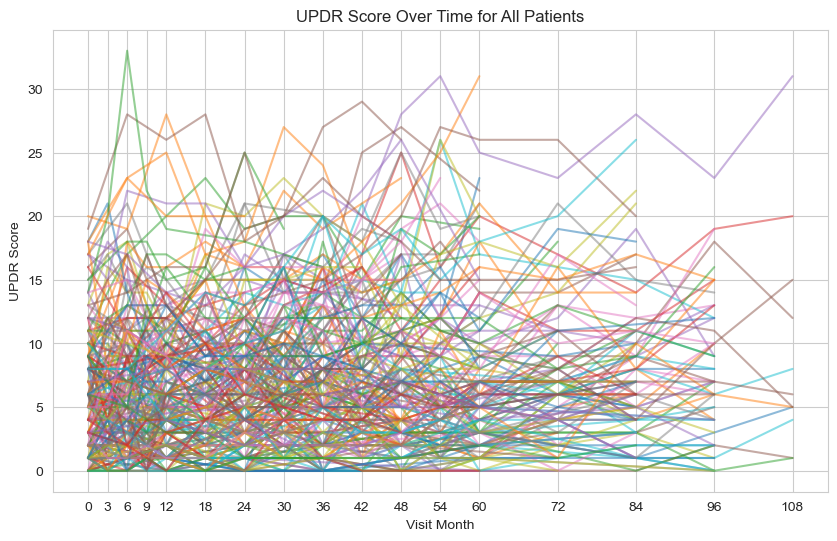

In [22]:
plt.figure(figsize=(10, 6))

for patient_id, row in clinical_updrs1.iterrows():
    values = row.dropna()
    months =  values.index 
    plt.plot(months, values.values,  alpha=0.5)

plt.xlabel('Visit Month')
plt.ylabel('UPDR Score')
plt.title('UPDR Score Over Time for All Patients')
plt.xticks(clinical_updrs1.columns)  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()


In [23]:
binary_matrix = clinical_updrs1[clinical_updrs1.columns].notna().astype(int)
binary_matrix.shape


(248, 17)

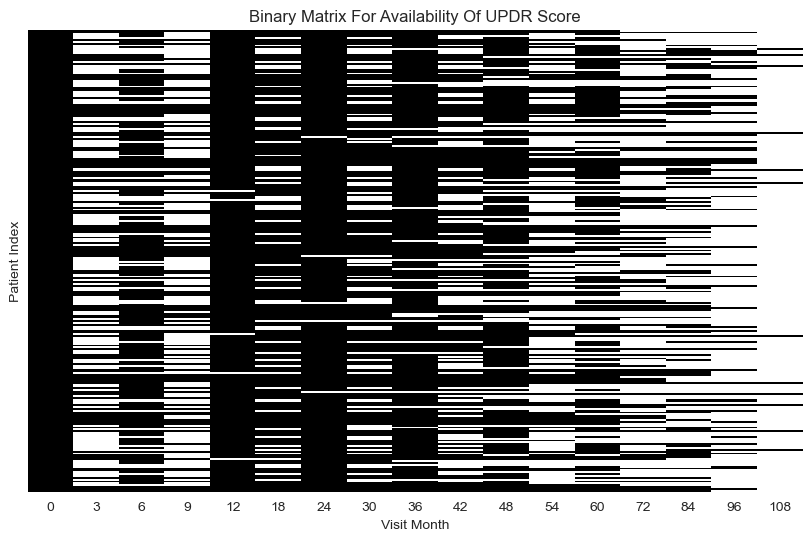

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix, cmap='Greys', cbar=False)
plt.xlabel('Visit Month')
plt.ylabel('Patient Index')
plt.title('Binary Matrix For Availability Of UPDR Score')
plt.yticks([],[])  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()

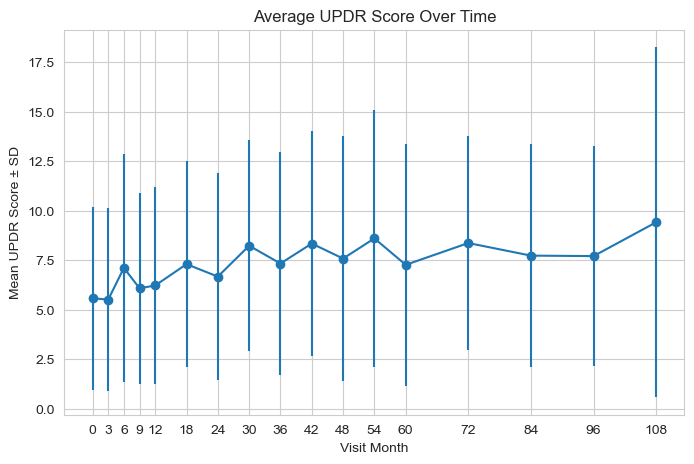

In [25]:
mean_updr_1_score = clinical_updrs1.mean()
std_updr_1_score = clinical_updrs1.std()
median_updr_1_score = clinical_updrs1.median()
visit_months = clinical_updrs1.columns
plt.figure(figsize=(8, 5))
plt.errorbar(visit_months, mean_updr_1_score, yerr =std_updr_1_score, fmt='-o')
plt.title("Average UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Mean UPDR Score ± SD")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

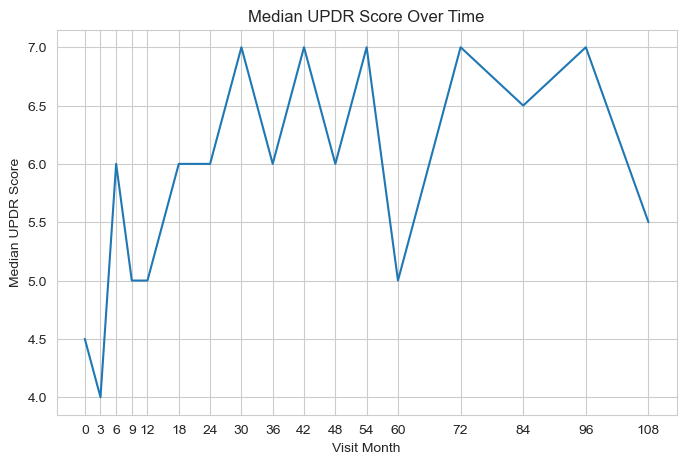

In [26]:
median_updr_1_score = clinical_updrs1.median()
plt.figure(figsize=(8, 5))
plt.plot(visit_months, median_updr_1_score )
plt.title("Median UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Median UPDR Score")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

In [27]:
summary = clinical_updrs1.describe().T
print(summary)

             count      mean       std  min   25%  50%    75%   max
visit_month                                                        
0            248.0  5.572581  4.619398  0.0  2.00  4.5   8.00  20.0
3            115.0  5.513043  4.636554  0.0  2.00  4.0   7.00  21.0
6            192.0  7.109375  5.744427  0.0  3.00  6.0  10.00  33.0
9             99.0  6.080808  4.810017  0.0  2.00  5.0   9.00  22.0
12           243.0  6.222222  4.979296  0.0  2.00  5.0   9.00  28.0
18           187.0  7.299465  5.200925  0.0  4.00  6.0  10.00  28.0
24           243.0  6.670782  5.215070  0.0  3.00  6.0   9.50  25.0
30           173.0  8.231214  5.313843  0.0  4.00  7.0  11.00  27.0
36           226.0  7.331858  5.639587  0.0  3.00  6.0  11.00  27.0
42           153.0  8.339869  5.694138  0.0  4.00  7.0  12.00  29.0
48           196.0  7.581633  6.203264  0.0  3.00  6.0  11.00  28.0
54           110.0  8.600000  6.496576  0.0  4.00  7.0  12.00  31.0
60           166.0  7.265060  6.097360  0.0  3.0

## UPDRS2

In [28]:
clinical_updrs2_prelim = clinical[[ 'patient_id', 'visit_month', 'updrs_2' ]].copy()

In [29]:
clinical_updrs2 = clinical_updrs2_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_2' )

In [30]:
clinical_updrs2.columns

Index([0, 3, 6, 9, 12, 18, 24, 30, 36, 42, 48, 54, 60, 72, 84, 96, 108], dtype='int64', name='visit_month')

In [31]:
clinical_updrs2.head()

visit_month,0,3,6,9,12,18,24,30,36,42,48,54,60,72,84,96,108
patient_id,,,,,,,,,,,,,,,,,
55,6.0,7.0,10.0,9.0,10.0,13.0,9.0,13.0,18.0,20.0,16.0,18.0,21.0,NaN,NaN,NaN,NaN
942,2.0,2.0,2.0,NaN,2.0,5.0,3.0,4.0,4.0,3.0,6.0,4.0,5.0,2.0,8.0,9.0,NaN
1517,6.0,NaN,4.0,NaN,11.0,14.0,11.0,15.0,17.0,13.0,18.0,NaN,18.0,NaN,NaN,NaN,NaN
1923,0.0,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN


In [32]:
clinical_updrs2.shape

(248, 17)

In [33]:
clinical_updrs2.isna().sum()

visit_month
0        0
3      133
6       56
9      150
12       5
18      61
24       5
30      75
36      22
42      95
48      52
54     138
60      82
72     155
84     148
96     190
108    236
dtype: int64

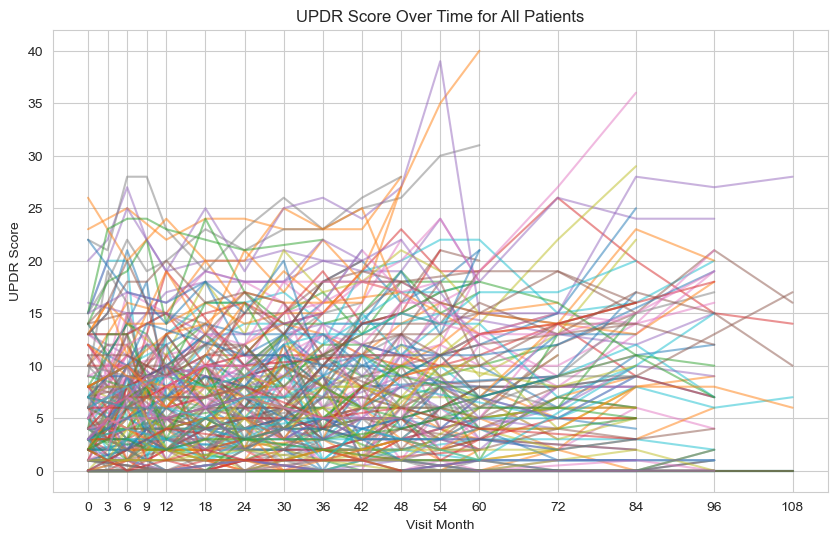

In [35]:
plt.figure(figsize=(10, 6))

for patient_id, row in clinical_updrs2.iterrows():
    values = row.dropna()
    months =  values.index 
    plt.plot(months, values.values,  alpha=0.5)

plt.xlabel('Visit Month')
plt.ylabel('UPDR Score')
plt.title('UPDR Score Over Time for All Patients')
plt.xticks(clinical_updrs2.columns)  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()


In [36]:
binary_matrix2 = clinical_updrs2[clinical_updrs2.columns].notna().astype(int)
binary_matrix2.shape


(248, 17)

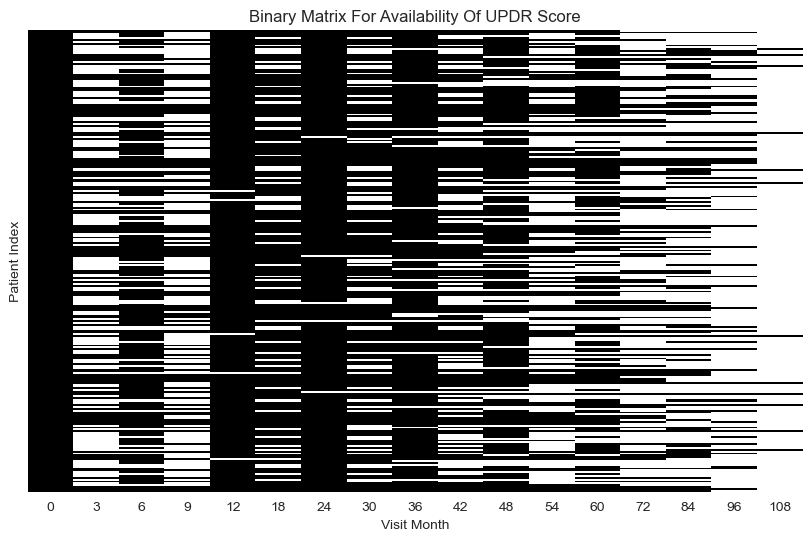

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix2, cmap='Greys', cbar=False)
plt.xlabel('Visit Month')
plt.ylabel('Patient Index')
plt.title('Binary Matrix For Availability Of UPDR Score')
plt.yticks([],[])  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()

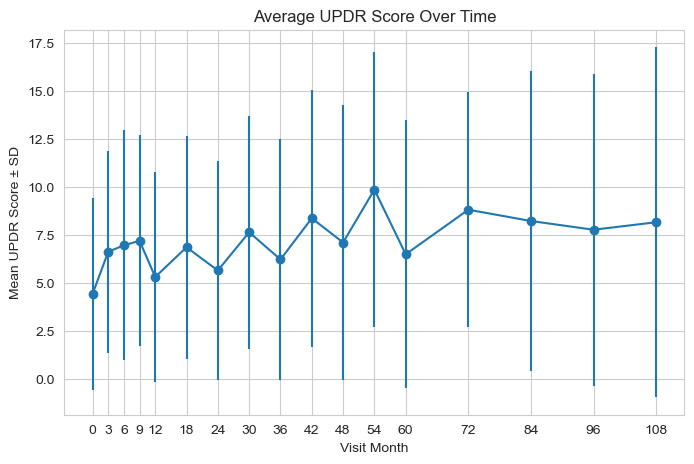

In [38]:
mean_updr_2_score = clinical_updrs2.mean()
std_updr_2_score = clinical_updrs2.std()
median_updr_2_score = clinical_updrs2.median()
visit_months = clinical_updrs2.columns
plt.figure(figsize=(8, 5))
plt.errorbar(visit_months, mean_updr_2_score, yerr =std_updr_2_score, fmt='-o')
plt.title("Average UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Mean UPDR Score ± SD")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

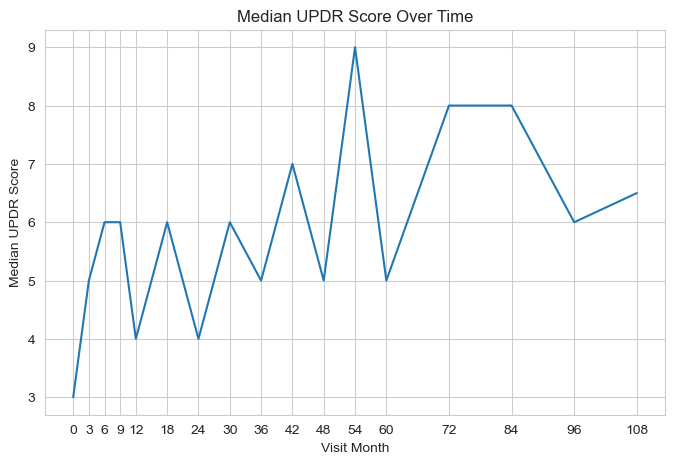

In [39]:
median_updr_2_score = clinical_updrs2.median()
plt.figure(figsize=(8, 5))
plt.plot(visit_months, median_updr_2_score )
plt.title("Median UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Median UPDR Score")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

In [40]:
summary = clinical_updrs2.describe().T
print(summary)

             count      mean       std  min   25%  50%    75%   max
visit_month                                                        
0            248.0  4.439516  4.969988  0.0  0.00  3.0   7.00  26.0
3            115.0  6.634783  5.247105  0.0  3.00  5.0   9.00  23.0
6            192.0  6.963542  5.971461  0.0  2.00  6.0  10.00  28.0
9             98.0  7.204082  5.492186  0.0  4.00  6.0   8.75  28.0
12           243.0  5.320988  5.466261  0.0  0.00  4.0   9.00  24.0
18           187.0  6.866310  5.800286  0.0  2.00  6.0  10.00  25.0
24           243.0  5.658436  5.678963  0.0  0.50  4.0   9.00  24.0
30           173.0  7.647399  6.054736  0.0  3.00  6.0  11.00  26.0
36           226.0  6.230088  6.278724  0.0  0.25  5.0  10.00  26.0
42           153.0  8.372549  6.672688  0.0  3.00  7.0  13.00  26.0
48           196.0  7.112245  7.147361  0.0  0.75  5.0  11.00  28.0
54           110.0  9.863636  7.165766  0.0  4.25  9.0  14.00  39.0
60           166.0  6.500000  6.967239  0.0  0.0

## UPDRS3

In [41]:
clinical_updrs3_prelim = clinical[[ 'patient_id', 'visit_month', 'updrs_3' ]].copy()

In [42]:
clinical_updrs3 = clinical_updrs3_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_3' )

In [43]:
clinical_updrs3.columns

Index([0, 3, 6, 9, 12, 18, 24, 30, 36, 42, 48, 54, 60, 72, 84, 96, 108], dtype='int64', name='visit_month')

In [44]:
clinical_updrs3.head()

visit_month,0,3,6,9,12,18,24,30,36,42,48,54,60,72,84,96,108
patient_id,,,,,,,,,,,,,,,,,
55,15.0,25.0,34.0,30.0,41.0,38.0,49.0,49.0,51.0,41.0,52.0,51.0,56.0,NaN,NaN,NaN,NaN
942,20.0,17.0,21.0,NaN,25.0,18.0,23.0,19.0,19.0,32.0,35.0,26.0,31.0,33.0,26.0,39.0,NaN
1517,25.0,NaN,30.0,NaN,32.0,25.0,28.0,39.0,31.0,37.0,40.0,NaN,39.0,NaN,NaN,NaN,NaN
1923,0.0,NaN,0.0,NaN,1.0,3.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660,0.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN


In [45]:
clinical_updrs3.shape

(248, 17)

In [46]:
clinical_updrs3.isna().sum()

visit_month
0        0
3      134
6       57
9      149
12       7
18      63
24       9
30      75
36      24
42      94
48      55
54     139
60      82
72     157
84     153
96     192
108    236
dtype: int64

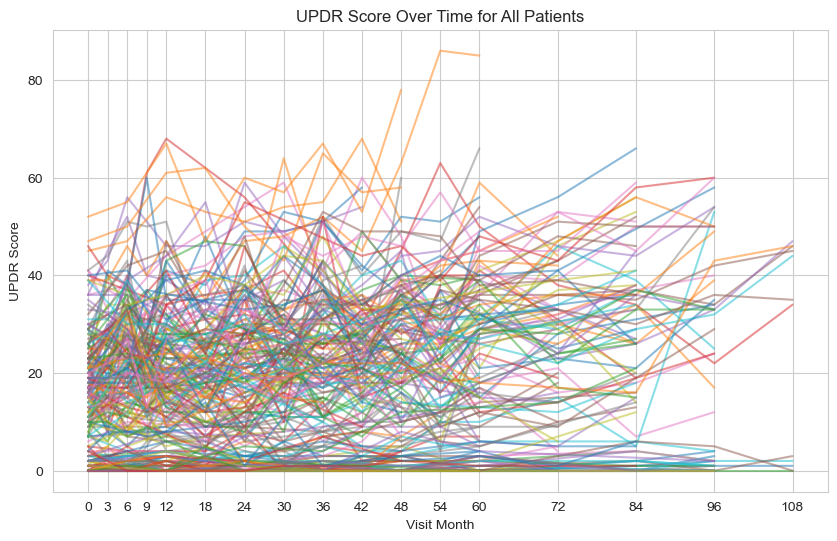

In [47]:
plt.figure(figsize=(10, 6))

for patient_id, row in clinical_updrs3.iterrows():
    values = row.dropna()
    months =  values.index 
    plt.plot(months, values.values,  alpha=0.5)

plt.xlabel('Visit Month')
plt.ylabel('UPDR Score')
plt.title('UPDR Score Over Time for All Patients')
plt.xticks(clinical_updrs3.columns)  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()


In [48]:
binary_matrix3 = clinical_updrs3[clinical_updrs3.columns].notna().astype(int)
binary_matrix3.shape


(248, 17)

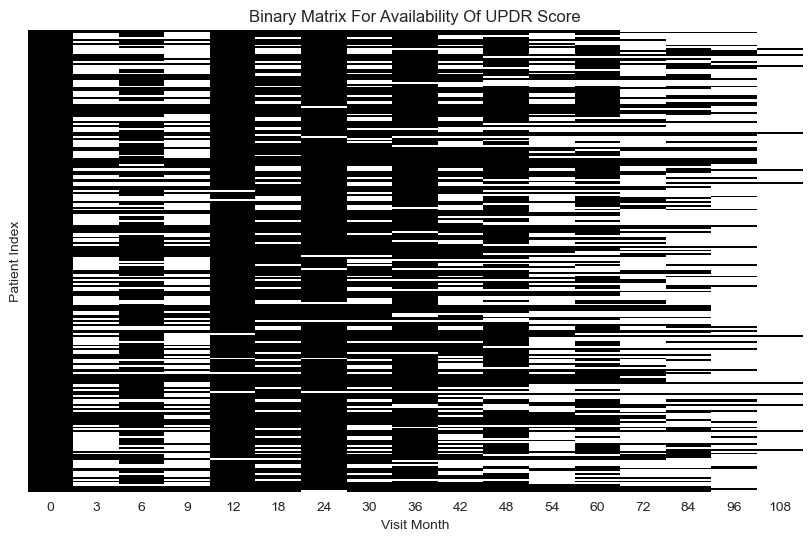

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix3, cmap='Greys', cbar=False)
plt.xlabel('Visit Month')
plt.ylabel('Patient Index')
plt.title('Binary Matrix For Availability Of UPDR Score')
plt.yticks([],[])  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()

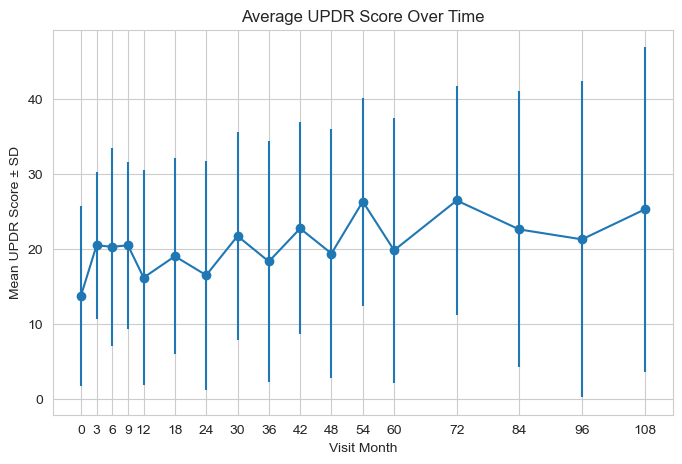

In [50]:
mean_updr_3_score = clinical_updrs3.mean()
std_updr_3_score = clinical_updrs3.std()
median_updr_3_score = clinical_updrs3.median()
visit_months = clinical_updrs3.columns
plt.figure(figsize=(8, 5))
plt.errorbar(visit_months, mean_updr_3_score, yerr =std_updr_3_score, fmt='-o')
plt.title("Average UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Mean UPDR Score ± SD")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

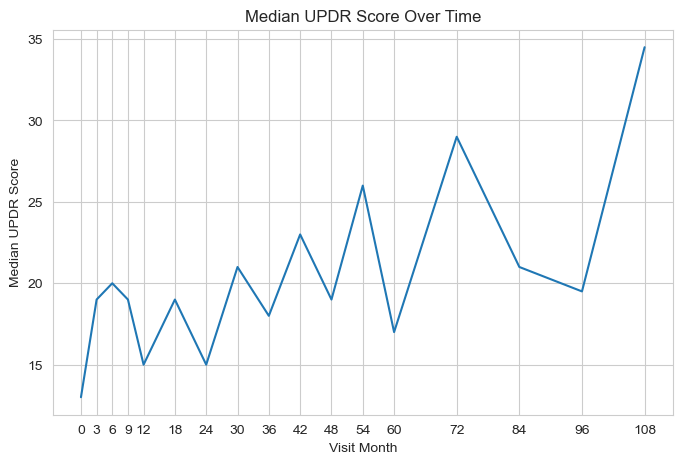

In [51]:
median_updr_2_score = clinical_updrs3.median()
plt.figure(figsize=(8, 5))
plt.plot(visit_months, median_updr_3_score )
plt.title("Median UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Median UPDR Score")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

In [52]:
summary = clinical_updrs3.describe().T
print(summary)

             count       mean        std  min    25%   50%    75%   max
visit_month                                                            
0            248.0  13.754032  11.971626  0.0   2.00  13.0  21.00  52.0
3            114.0  20.482456   9.787325  1.0  14.00  19.0  27.75  45.0
6            191.0  20.272251  13.170910  0.0  11.00  20.0  29.00  56.0
9             99.0  20.474747  11.133094  0.0  13.00  19.0  26.00  61.0
12           241.0  16.165975  14.347381  0.0   3.00  15.0  26.00  68.0
18           185.0  19.016216  13.066084  0.0   9.00  19.0  27.00  62.0
24           239.0  16.489540  15.236473  0.0   1.00  15.0  28.00  60.0
30           173.0  21.710983  13.888583  0.0  12.00  21.0  29.00  64.0
36           224.0  18.316964  16.041775  0.0   2.00  18.0  30.25  67.0
42           154.0  22.720779  14.128494  0.0  12.25  23.0  30.75  68.0
48           193.0  19.378238  16.538684  0.0   3.00  19.0  33.00  78.0
54           109.0  26.311927  13.861549  0.0  16.00  26.0  34.0

## UPDRS4

In [53]:
clinical_updrs4_prelim = clinical[[ 'patient_id', 'visit_month', 'updrs_4' ]].copy()

In [54]:
clinical_updrs4 = clinical_updrs4_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_4' )

In [55]:
clinical_updrs4.columns

Index([0, 3, 6, 9, 12, 18, 24, 30, 36, 42, 48, 54, 60, 72, 84, 96, 108], dtype='int64', name='visit_month')

In [56]:
clinical_updrs4.head()

visit_month,0,3,6,9,12,18,24,30,36,42,48,54,60,72,84,96,108
patient_id,,,,,,,,,,,,,,,,,
55,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
942,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN
1517,5.0,NaN,7.0,NaN,5.0,5.0,3.0,10.0,8.0,4.0,6.0,NaN,10.0,NaN,NaN,NaN,NaN
1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
clinical_updrs4.shape

(248, 17)

In [58]:
clinical_updrs4.isna().sum()

visit_month
0      185
3      241
6      183
9      205
12     115
18     111
24      93
30     102
36      86
42     111
48     112
54     150
60     138
72     165
84     183
96     218
108    241
dtype: int64

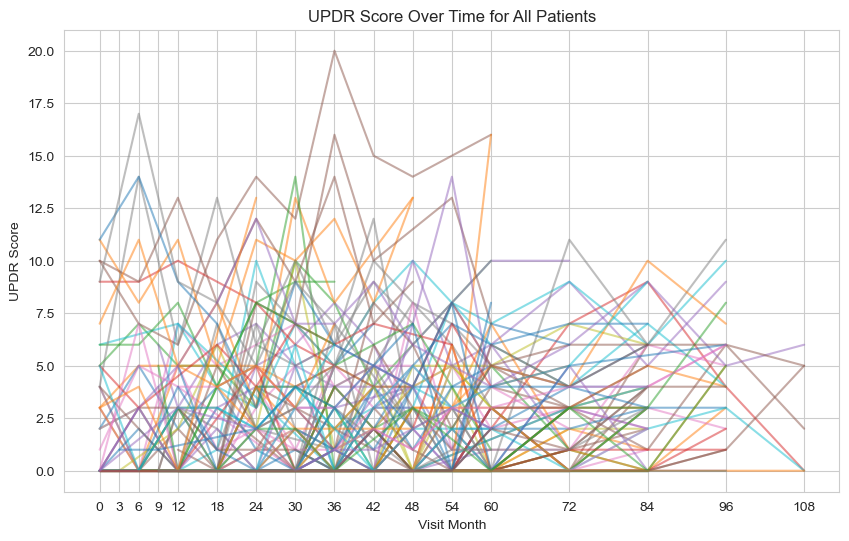

In [59]:
plt.figure(figsize=(10, 6))

for patient_id, row in clinical_updrs4.iterrows():
    values = row.dropna()
    months =  values.index 
    plt.plot(months, values.values,  alpha=0.5)

plt.xlabel('Visit Month')
plt.ylabel('UPDR Score')
plt.title('UPDR Score Over Time for All Patients')
plt.xticks(clinical_updrs4.columns)  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()


In [60]:
binary_matrix4 = clinical_updrs4[clinical_updrs4.columns].notna().astype(int)
binary_matrix4.shape


(248, 17)

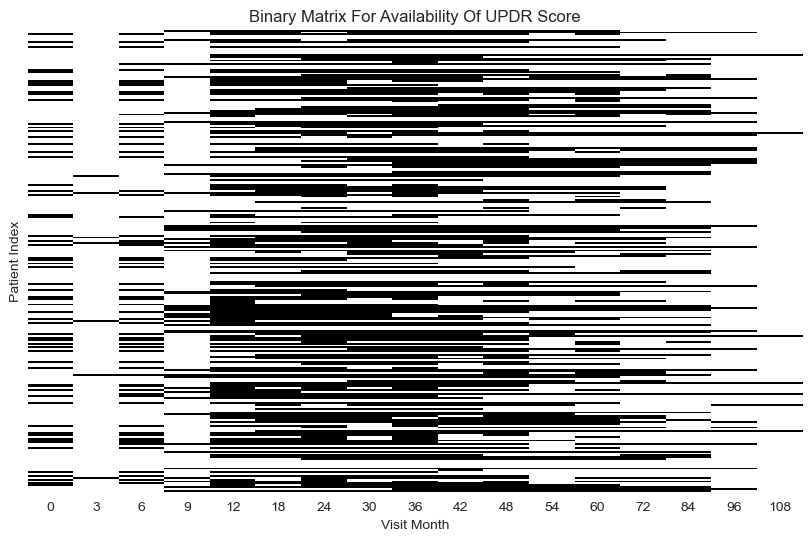

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix4, cmap='Greys', cbar=False)
plt.xlabel('Visit Month')
plt.ylabel('Patient Index')
plt.title('Binary Matrix For Availability Of UPDR Score')
plt.yticks([],[])  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()

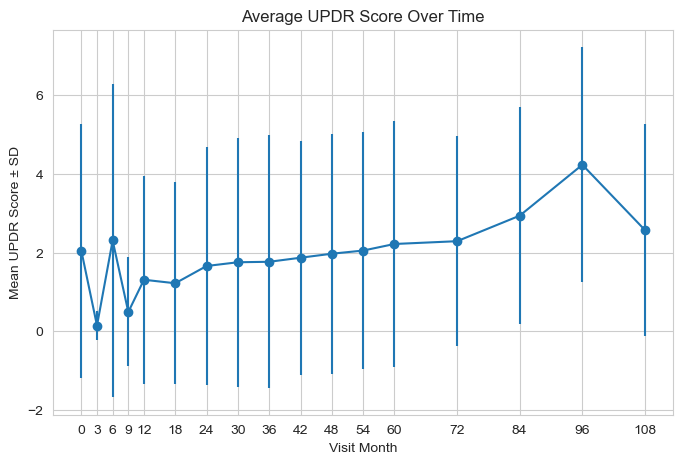

In [62]:
mean_updr_4_score = clinical_updrs4.mean()
std_updr_4_score = clinical_updrs4.std()
median_updr_4_score = clinical_updrs4.median()
visit_months = clinical_updrs4.columns
plt.figure(figsize=(8, 5))
plt.errorbar(visit_months, mean_updr_4_score, yerr =std_updr_4_score, fmt='-o')
plt.title("Average UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Mean UPDR Score ± SD")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

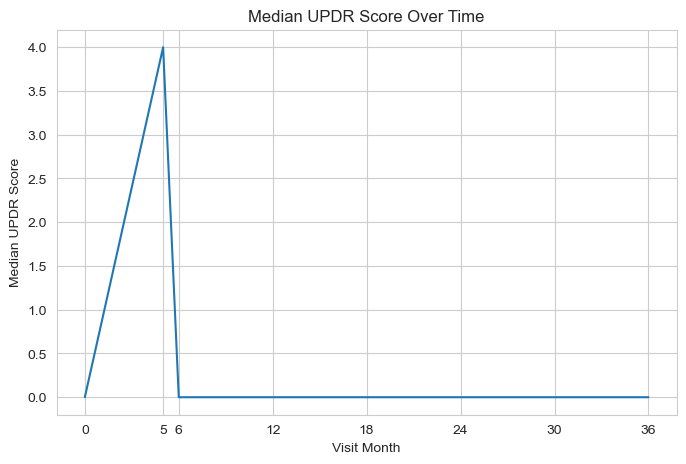

In [ ]:
median_updr_4_score = clinical_updrs4.median()
plt.figure(figsize=(8, 5))
plt.plot(visit_months, median_updr_4_score )
plt.title("Median UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Median UPDR Score")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

In [63]:
summary = clinical_updrs4.describe().T
print(summary)

             count      mean       std  min  25%  50%   75%   max
visit_month                                                      
0             63.0  2.047619  3.235033  0.0  0.0  0.0  3.50  11.0
3              7.0  0.142857  0.377964  0.0  0.0  0.0  0.00   1.0
6             65.0  2.307692  3.987963  0.0  0.0  0.0  3.00  17.0
9             43.0  0.488372  1.386535  0.0  0.0  0.0  0.00   6.0
12           133.0  1.308271  2.646268  0.0  0.0  0.0  1.00  13.0
18           137.0  1.218978  2.571665  0.0  0.0  0.0  0.00  13.0
24           155.0  1.658065  3.024658  0.0  0.0  0.0  2.00  14.0
30           146.0  1.753425  3.170036  0.0  0.0  0.0  2.75  14.0
36           162.0  1.765432  3.217852  0.0  0.0  0.0  3.00  20.0
42           137.0  1.868613  2.977409  0.0  0.0  0.0  3.00  15.0
48           136.0  1.970588  3.050054  0.0  0.0  0.0  3.25  14.0
54            98.0  2.051020  3.006428  0.0  0.0  0.0  3.00  14.0
60           110.0  2.218182  3.134249  0.0  0.0  0.0  4.00  16.0
72        

## Filtered Clinical by UPDRS4 scores

In [72]:
nan_updrs4 = clinical_updrs4[clinical_updrs4.isna().all(axis=1)].index

In [73]:
clinical_filt = clinical[clinical['patient_id'].isin(nan_updrs4)]

In [74]:
clinical_filt_updrs1_prelim = clinical_filt[[ 'patient_id', 'visit_month', 'updrs_1' ]].copy()

In [75]:
clinical_filt_updrs1 = clinical_filt_updrs1_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_1' )

In [76]:
clinical_filt_updrs1.columns

Index([0, 3, 6, 9, 12, 18, 24, 30, 36, 42, 48, 54, 60, 72, 84, 96, 108], dtype='int64', name='visit_month')

In [77]:
clinical_filt_updrs1.head()

visit_month,0,3,6,9,12,18,24,30,36,42,48,54,60,72,84,96,108
patient_id,,,,,,,,,,,,,,,,,
1923,2.0,NaN,2.0,NaN,1.0,2.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660,2.0,NaN,NaN,NaN,0.0,NaN,2.0,NaN,8.0,NaN,6.0,NaN,5.0,NaN,NaN,NaN,NaN
4161,6.0,1.0,1.0,3.0,6.0,8.0,4.0,10.0,8.0,10.0,6.0,9.0,NaN,NaN,NaN,NaN,NaN
4172,2.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,0.0,NaN,1.0,NaN,3.0,1.0,NaN
5027,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,3.0,NaN,1.0,NaN,5.0


In [78]:
clinical_filt_updrs1.shape

(65, 17)

In [79]:
clinical_filt_updrs1.isna().sum()

visit_month
0       0
3      57
6      44
9      57
12      0
18     44
24      0
30     46
36      9
42     49
48     12
54     56
60     15
72     57
84     36
96     43
108    60
dtype: int64

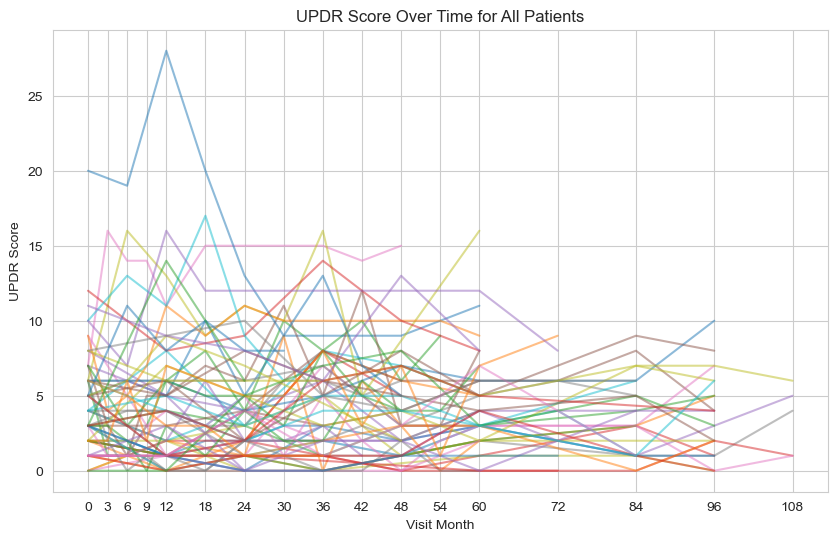

In [81]:
plt.figure(figsize=(10, 6))

for patient_id, row in clinical_filt_updrs1.iterrows():
    values = row.dropna()
    months =  values.index 
    plt.plot(months, values.values,  alpha=0.5)

plt.xlabel('Visit Month')
plt.ylabel('UPDR Score')
plt.title('UPDR Score Over Time for All Patients')
plt.xticks(clinical_filt_updrs1.columns)  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()


In [82]:
binary_matrix = clinical_filt_updrs1[clinical_filt_updrs1.columns].notna().astype(int)
binary_matrix.shape


(65, 17)

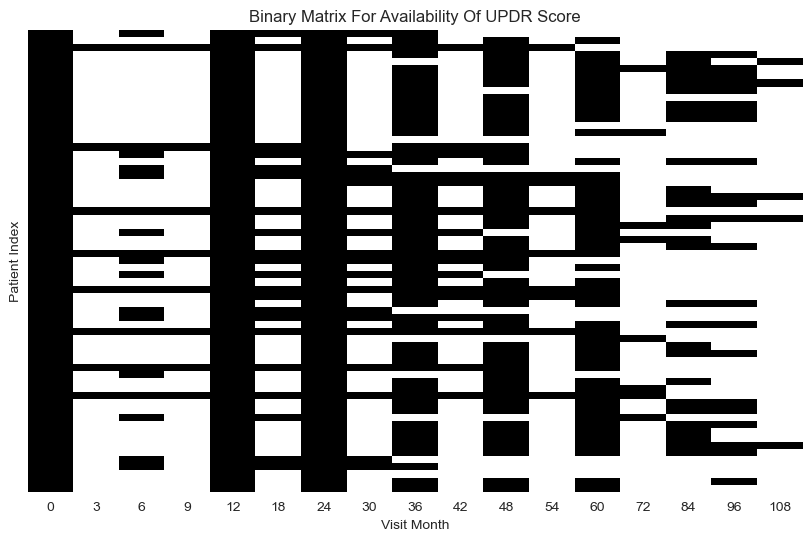

In [83]:
plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix, cmap='Greys', cbar=False)
plt.xlabel('Visit Month')
plt.ylabel('Patient Index')
plt.title('Binary Matrix For Availability Of UPDR Score')
plt.yticks([],[])  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()

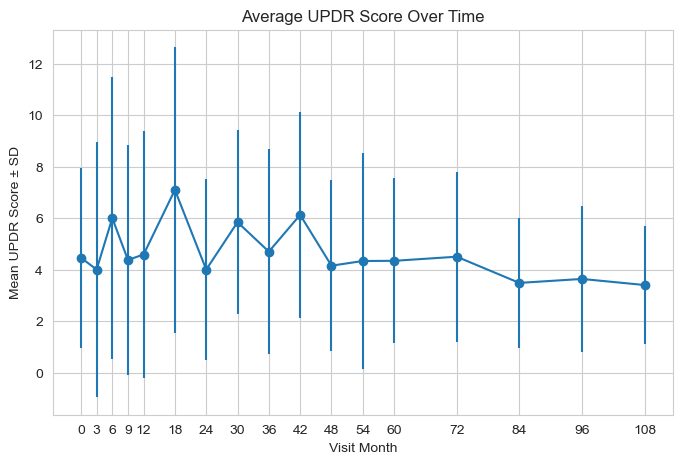

In [85]:
mean_filt_updr_1_score = clinical_filt_updrs1.mean()
std_filt_updr_1_score = clinical_filt_updrs1.std()
median_filt_updr_1_score = clinical_filt_updrs1.median()
visit_months = clinical_filt_updrs1.columns
plt.figure(figsize=(8, 5))
plt.errorbar(visit_months, mean_filt_updr_1_score, yerr =std_filt_updr_1_score, fmt='-o')
plt.title("Average UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Mean UPDR Score ± SD")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

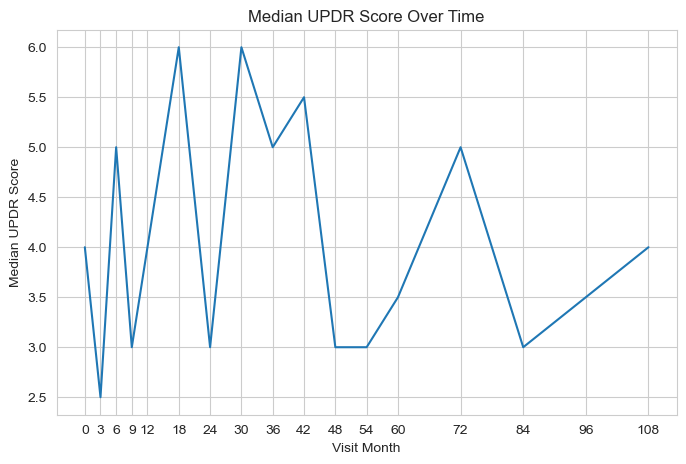

In [86]:
median_updr_1_score = clinical_filt_updrs1.median()
plt.figure(figsize=(8, 5))
plt.plot(visit_months, median_updr_1_score )
plt.title("Median UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Median UPDR Score")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

In [ ]:
summary = clinical_updrs1.describe().T
print(summary)

             count      mean       std  min   25%  50%    75%   max
visit_month                                                        
0            248.0  5.572581  4.619398  0.0  2.00  4.5   8.00  20.0
3            115.0  5.513043  4.636554  0.0  2.00  4.0   7.00  21.0
6            192.0  7.109375  5.744427  0.0  3.00  6.0  10.00  33.0
9             99.0  6.080808  4.810017  0.0  2.00  5.0   9.00  22.0
12           243.0  6.222222  4.979296  0.0  2.00  5.0   9.00  28.0
18           187.0  7.299465  5.200925  0.0  4.00  6.0  10.00  28.0
24           243.0  6.670782  5.215070  0.0  3.00  6.0   9.50  25.0
30           173.0  8.231214  5.313843  0.0  4.00  7.0  11.00  27.0
36           226.0  7.331858  5.639587  0.0  3.00  6.0  11.00  27.0
42           153.0  8.339869  5.694138  0.0  4.00  7.0  12.00  29.0
48           196.0  7.581633  6.203264  0.0  3.00  6.0  11.00  28.0
54           110.0  8.600000  6.496576  0.0  4.00  7.0  12.00  31.0
60           166.0  7.265060  6.097360  0.0  3.0

## UPDRS2

In [ ]:
clinical_updrs2_prelim = clinical[[ 'patient_id', 'visit_month', 'updrs_2' ]].copy()

In [ ]:
clinical_updrs2 = clinical_updrs2_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_2' )

In [ ]:
clinical_updrs2.columns

Index([0, 3, 6, 9, 12, 18, 24, 30, 36, 42, 48, 54, 60, 72, 84, 96, 108], dtype='int64', name='visit_month')

In [ ]:
clinical_updrs2.head()

visit_month,0,3,6,9,12,18,24,30,36,42,48,54,60,72,84,96,108
patient_id,,,,,,,,,,,,,,,,,
55,6.0,7.0,10.0,9.0,10.0,13.0,9.0,13.0,18.0,20.0,16.0,18.0,21.0,NaN,NaN,NaN,NaN
942,2.0,2.0,2.0,NaN,2.0,5.0,3.0,4.0,4.0,3.0,6.0,4.0,5.0,2.0,8.0,9.0,NaN
1517,6.0,NaN,4.0,NaN,11.0,14.0,11.0,15.0,17.0,13.0,18.0,NaN,18.0,NaN,NaN,NaN,NaN
1923,0.0,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
clinical_updrs2.shape

(248, 17)

In [ ]:
clinical_updrs2.isna().sum()

visit_month
0        0
3      133
6       56
9      150
12       5
18      61
24       5
30      75
36      22
42      95
48      52
54     138
60      82
72     155
84     148
96     190
108    236
dtype: int64

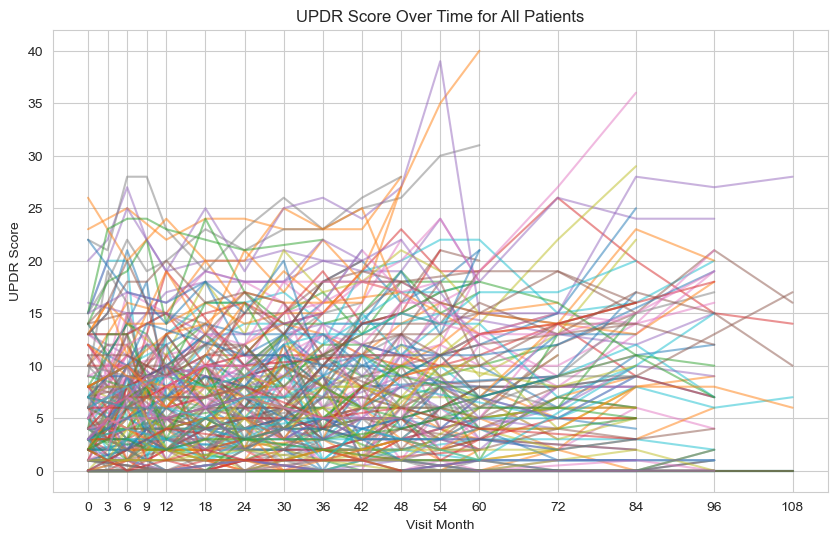

In [ ]:
plt.figure(figsize=(10, 6))

for patient_id, row in clinical_updrs2.iterrows():
    values = row.dropna()
    months =  values.index 
    plt.plot(months, values.values,  alpha=0.5)

plt.xlabel('Visit Month')
plt.ylabel('UPDR Score')
plt.title('UPDR Score Over Time for All Patients')
plt.xticks(clinical_updrs2.columns)  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()


In [ ]:
binary_matrix2 = clinical_updrs2[clinical_updrs2.columns].notna().astype(int)
binary_matrix2.shape


(248, 17)

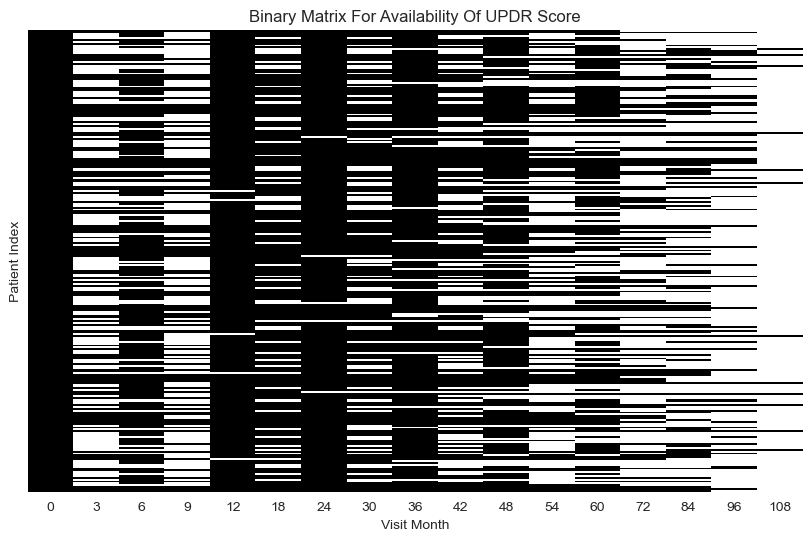

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix2, cmap='Greys', cbar=False)
plt.xlabel('Visit Month')
plt.ylabel('Patient Index')
plt.title('Binary Matrix For Availability Of UPDR Score')
plt.yticks([],[])  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()

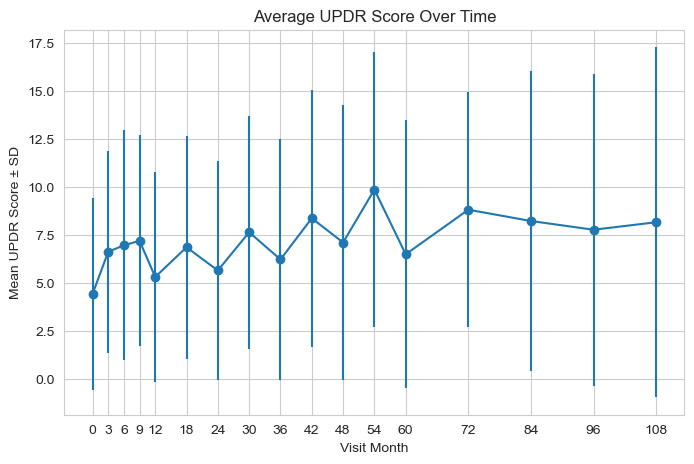

In [ ]:
mean_updr_2_score = clinical_updrs2.mean()
std_updr_2_score = clinical_updrs2.std()
median_updr_2_score = clinical_updrs2.median()
visit_months = clinical_updrs2.columns
plt.figure(figsize=(8, 5))
plt.errorbar(visit_months, mean_updr_2_score, yerr =std_updr_2_score, fmt='-o')
plt.title("Average UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Mean UPDR Score ± SD")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

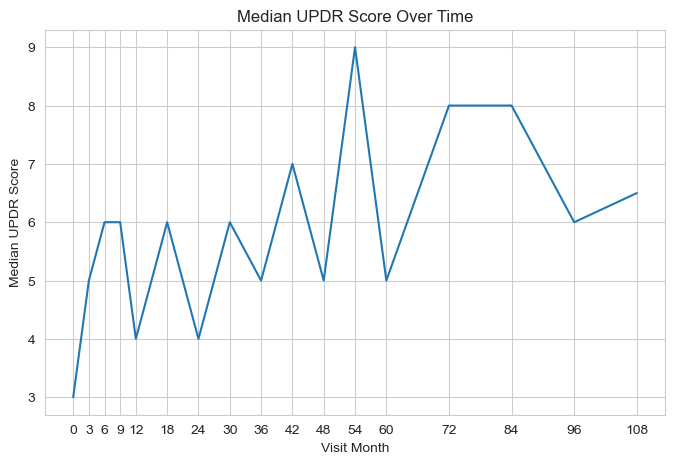

In [ ]:
median_updr_2_score = clinical_updrs2.median()
plt.figure(figsize=(8, 5))
plt.plot(visit_months, median_updr_2_score )
plt.title("Median UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Median UPDR Score")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

In [ ]:
summary = clinical_updrs2.describe().T
print(summary)

             count      mean       std  min   25%  50%    75%   max
visit_month                                                        
0            248.0  4.439516  4.969988  0.0  0.00  3.0   7.00  26.0
3            115.0  6.634783  5.247105  0.0  3.00  5.0   9.00  23.0
6            192.0  6.963542  5.971461  0.0  2.00  6.0  10.00  28.0
9             98.0  7.204082  5.492186  0.0  4.00  6.0   8.75  28.0
12           243.0  5.320988  5.466261  0.0  0.00  4.0   9.00  24.0
18           187.0  6.866310  5.800286  0.0  2.00  6.0  10.00  25.0
24           243.0  5.658436  5.678963  0.0  0.50  4.0   9.00  24.0
30           173.0  7.647399  6.054736  0.0  3.00  6.0  11.00  26.0
36           226.0  6.230088  6.278724  0.0  0.25  5.0  10.00  26.0
42           153.0  8.372549  6.672688  0.0  3.00  7.0  13.00  26.0
48           196.0  7.112245  7.147361  0.0  0.75  5.0  11.00  28.0
54           110.0  9.863636  7.165766  0.0  4.25  9.0  14.00  39.0
60           166.0  6.500000  6.967239  0.0  0.0